In [1]:
import numpy as np
from random import random
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader
from DatasetCreator import DatasetCreator
from tqdm import tqdm

from matplotlib import pyplot as plt

class ENN():
    def __init__ (self):
        self.model = torch.nn.Sequential(
            torch.nn.Linear(1,5),
            torch.nn.ReLU(),
            torch.nn.Linear(5,1)
        )
        self.optimizer = Adam(self.model.parameters(), lr = 0.001)

    def train_step(self, x, y, criterion):
        self.model.zero_grad()
        #print(x, y)
        x = x.float()
        y = y.float()
        x = x.view(-1,1)
        y = y.view(-1,1)
        #print(x,y)
        output = self.model(x)
        loss = criterion(output, y)
        loss.backward()
        self.optimizer.step()

    def train(self, data, epochs, batch):
        data_train = DataLoader(dataset = data, batch_size = batch, shuffle = True)
        criterion = torch.nn.MSELoss()
        for epoch in range(epochs):
            for dummy, batch in tqdm(enumerate(data_train)):
                x_train, y_train = batch['input'], batch['output']
                #print(y_train)
                self.train_step(x_train, y_train, criterion)


10it [00:00, 331.66it/s]
10it [00:00, 831.51it/s]
10it [00:00, 861.47it/s]
10it [00:00, 907.27it/s]
10it [00:00, 988.06it/s]
10it [00:00, 1007.04it/s]
10it [00:00, 1085.76it/s]
10it [00:00, 1132.46it/s]
10it [00:00, 1161.79it/s]
10it [00:00, 1226.73it/s]
10it [00:00, 1269.00it/s]
10it [00:00, 1330.64it/s]
10it [00:00, 1347.70it/s]
10it [00:00, 1422.81it/s]
10it [00:00, 1551.49it/s]
10it [00:00, 1520.50it/s]
10it [00:00, 1551.09it/s]
10it [00:00, 1553.62it/s]
10it [00:00, 1558.00it/s]
10it [00:00, 1486.24it/s]
10it [00:00, 1531.66it/s]
10it [00:00, 1557.08it/s]
10it [00:00, 1561.72it/s]
10it [00:00, 1532.22it/s]
10it [00:00, 1549.09it/s]
10it [00:00, 1545.77it/s]
10it [00:00, 1548.74it/s]
10it [00:00, 1528.70it/s]
10it [00:00, 1521.16it/s]
10it [00:00, 1549.20it/s]
10it [00:00, 1569.96it/s]
10it [00:00, 1505.33it/s]
10it [00:00, 1518.57it/s]
10it [00:00, 1451.62it/s]
10it [00:00, 1447.56it/s]
10it [00:00, 1497.32it/s]
10it [00:00, 1427.07it/s]
10it [00:00, 1431.36it/s]
10it [00:00, 1440

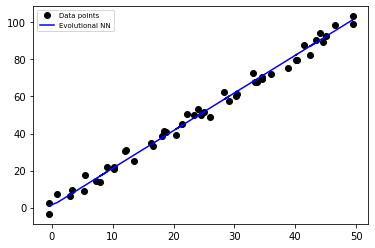

In [2]:
def main():
    EvolutionalNN = ENN()
    #for param_tensor in EvolutionalNN.model.state_dict():
        #print(param_tensor, "\t", EvolutionalNN.model.state_dict()[param_tensor][0])

    X_data = [not_biased_x_point + 3 * (random() - 0.5) for not_biased_x_point in range(50)]
    #Y_tensor = torch.tensor(Y_tensor)
    Y_data = [ (2 * x_point  + 2 + 10 * (random() - 0.5) ) for x_point in X_data]
    X_tensor = [[x] for x in X_data]
    X_tensor = torch.tensor(X_tensor)

    Dataset = DatasetCreator(X_data, "linear", [2, 2])
    EvolutionalNN.train(Dataset, 200, 5 )


    Y_NN = EvolutionalNN.model(X_tensor)
    Y_NN = Y_NN.detach().numpy()

    fig, ax = plt.subplots()
    ax.plot(X_data, Y_data, 'ko', label = "Data points")
    ax.plot(X_data, Y_NN, 'blue', label = "Evolutional NN")
    leg = ax.legend(loc = 'upper left', prop={'size':7})
    plt.show()

if __name__ == "__main__" :
    main()